![Image of Refugees](https://s23.postimg.org/72svz2hu3/header3.jpg)

# When a U.S. city becomes a sanctuary city, does its crime rate increase?

### Why Crime Rate and Sanctuary Cities?

Over the years there has been much debate as to whether or not sanctuary cities see an increase in crime as they allow illegal and refugee populations to live and work without fear of prosecution or deportation. This study will analyze the top 54 sanctuary cities in the United States, by population, and compare crime rate changes over the past 16 years. 

In recent times, President-Elect Donald Trump has taken a virulent position against sanctuary cities. Desipte this, our hypothesis is that the crime rate will not increase as a result of these cities becoming sanctuary cities. Below, we will use FBI Crime data to compare 54 cities to infer whether or not crime has increased or decreased after a city is declared a sanctuary. 

In [2]:
from io import BytesIO
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for pandas 
import requests as r
import seaborn as sns

%matplotlib inline 

## Import the Data

We must import the data set provided by the FBI Crime Database.

As you will see below, we imported sixteen years of data directly from the FBI website by utlizing the ```r.get``` and ```pd.read.excel``` commands. I had to skip between 3 and 4 rows of the data to get the proper column headers in the correct location.

In [3]:
xlsx2015 = str('https://ucr.fbi.gov/crime-in-the-u.s/2015/' +
           'crime-in-the-u.s.-2015/tables/table-8/' +
           'table_8_offenses_known_to_law_enforcement' +
               
           '_by_state_by_city_2015.xls')
fbi_req2015 = r.get(xlsx2015)

xlsx2014 = str('https://ucr.fbi.gov/crime-in-the-u.s/2014/' +
              'crime-in-the-u.s.-2014/tables/table-8/Table' +
               '_8_Offenses_Known_to_Law_Enforcement_by_State' +
              '_by_City_2014.xls')
fbi_req2014 = r.get(xlsx2014)

xlsx2013 = str('https://ucr.fbi.gov/crime-in-the-u.s/2013/' +
           'crime-in-the-u.s.-2013/tables/table-8/table' +
           '_8_offenses_known_to_law_enforcement_by_' +
           'state_by_city_2013.xls')
fbi_req2013 = r.get(xlsx2013)

xlsx2012 = str('https://ucr.fbi.gov/crime-in-the-u.s/2012/' +
           'crime-in-the-u.s.-2012/tables/8tabledatadecpdf/' +
           'table_8_offenses_known_to_law_enforcement_by_' +
           'state_by_city_2012.xls')
fbi_req2012 = r.get(xlsx2012)

xlsx2011 = str('https://ucr.fbi.gov/crime-in-the-u.s/2011/' +
               'crime-in-the-u.s.-2011/tables/table_8_offenses' +
               '_known_to_law_enforcement_by_state_by_city_2011.xls')
fbi_req2011 = r.get(xlsx2011)

xlsx2010 = str('https://ucr.fbi.gov/crime-in-the-u.s/2010/'
               'crime-in-the-u.s.-2010/tables/10tbl08.xls')
fbi_req2010 = r.get(xlsx2010)

xlsx2009 = str('https://www2.fbi.gov/ucr/cius2009/data/' +
               'documents/09tbl08.xls')
fbi_req2009 = r.get(xlsx2009)

xlsx2008 = str('https://www2.fbi.gov/ucr/cius2008/data/' +
               'documents/08tbl08.xls')
fbi_req2008 = r.get(xlsx2008)

xlsx2007 = str('https://www2.fbi.gov/ucr/cius2007/data/' +
               'documents/07tbl08.xls')
fbi_req2007 = r.get(xlsx2007)

xlsx2006 = str('https://www2.fbi.gov/ucr/cius2006/data/' +
               'documents/06tbl08.xls')
fbi_req2006 = r.get(xlsx2006)

xlsx2005 = str('https://www2.fbi.gov/ucr/05cius/data/' +
               'documents/05tbl08.xls')
fbi_req2005 = r.get(xlsx2005)

xlsx2004 = str('https://www2.fbi.gov/ucr/cius_04/' +
               'documents/04tbl08a.xls')
fbi_req2004 = r.get(xlsx2004)

xlsx2003 = str('https://ucr.fbi.gov/crime-in-the-u.s/2003/' +
               'table8_known_leos03.xls')
fbi_req2003 = r.get(xlsx2003)

xlsx2002 = str('https://ucr.fbi.gov/crime-in-the-u.s/2002/' +
               'table8_offenses_pop.over02.xls')
fbi_req2002 = r.get(xlsx2002)

xlsx2001 = str('https://ucr.fbi.gov/crime-in-the-u.s/2001/' +
               'table8_leospop.over01.xls')
fbi_req2001 = r.get(xlsx2001)

xlsx2000 = str('https://ucr.fbi.gov/crime-in-the-u.s/2000/' +
               'table8_leos_pop.-over00.xls')
fbi_req2000 = r.get(xlsx2001)

yr2015 = pd.read_excel(BytesIO(fbi_req2015.content), skiprows=3)     
yr2014 = pd.read_excel(BytesIO(fbi_req2014.content), skiprows=3)
yr2013 = pd.read_excel(BytesIO(fbi_req2013.content), skiprows=3)
yr2012 = pd.read_excel(BytesIO(fbi_req2012.content), skiprows=3)     
yr2011 = pd.read_excel(BytesIO(fbi_req2011.content), skiprows=3)
yr2010 = pd.read_excel(BytesIO(fbi_req2010.content), skiprows=3)
yr2009 = pd.read_excel(BytesIO(fbi_req2009.content), skiprows=3)     
yr2008 = pd.read_excel(BytesIO(fbi_req2008.content), skiprows=3)
yr2007 = pd.read_excel(BytesIO(fbi_req2007.content), skiprows=3)
yr2006 = pd.read_excel(BytesIO(fbi_req2006.content), skiprows=3)    
yr2005 = pd.read_excel(BytesIO(fbi_req2005.content), skiprows=3)
yr2004 = pd.read_excel(BytesIO(fbi_req2004.content), skiprows=3)
yr2003 = pd.read_excel(BytesIO(fbi_req2003.content), skiprows=4)     
yr2002 = pd.read_excel(BytesIO(fbi_req2002.content), skiprows=3)
yr2001 = pd.read_excel(BytesIO(fbi_req2001.content), skiprows=3)
yr2000 = pd.read_excel(BytesIO(fbi_req2000.content), skiprows=3) 

## Clean the Data

Below, we take the impored data and begin cleaning up the raw variables.

In the years 2006 and 2008, we ran into an issue because the data was improperly being read as an object instead of as an integer. We were forced to "coerce" the data in order to complete the next step.


In [4]:
yr2008["Property crime"] = pd.to_numeric(yr2008["Property crime"], errors="coerce")
yr2008["Violent crime"] = pd.to_numeric(yr2008["Violent crime"], errors="coerce")

yr2006["Violent crime"] = pd.to_numeric(yr2006["Violent crime"], errors="coerce")
yr2006["Violent crime"] = pd.to_numeric(yr2006["Violent crime"], errors="coerce")

Next, for the purposes of analyzing changes in crime over time, we combined the total Violent Crime and total Property Crime into a single new column of total crime for each year. 

In [5]:
yr2015['2015'] = yr2015['Violent\ncrime'] + yr2015['Property\ncrime']
yr2014['2014'] = yr2014['Violent\ncrime'] + yr2014['Property\ncrime']
yr2013['2013'] = yr2013['Violent\ncrime'] + yr2013['Property\ncrime']
yr2012['2012'] = yr2012['Violent\ncrime'] + yr2012['Property\ncrime']
yr2011['2011'] = yr2011['Violent\ncrime'] + yr2011['Property\ncrime']
yr2010['2010'] = yr2010['Violent crime'] + yr2010['Property crime']
yr2009['2009'] = yr2009['Violent crime'] + yr2009['Property crime']
yr2008['2008'] = yr2008['Violent crime'] + yr2008['Property crime']
yr2007['2007'] = yr2007['Violent crime'] + yr2007['Property crime']
yr2006['2006'] = yr2006['Violent crime'] + yr2006['Property crime']
yr2005['2005'] = yr2005['Violent crime'] + yr2005['Property crime']
yr2004['2004'] = yr2004['Violent crime'] + yr2004['Property crime']
yr2003['2003'] = yr2003['Violent crime'] + yr2003['Property crime']

In the years 2000 - 2002, the FBI provided the total number of crimes so we simply renamed the column to match the nomenclature of the other years.

In [6]:
yr2002 = yr2002.rename(columns={'Crime Index  ' : '2002'})
yr2001 = yr2001.rename(columns={'Crime Index total' : '2001'})
yr2000 = yr2000.rename(columns={'Crime Index total' : '2000'})

After creating the totals, i had to manipulate years 2000-2004 city and state column. The raw data had the city and state in the same column. We had to separate out the state to match the formatting of later year data and put it in a new column. We then relabeled the columns to be in line with the years 2005-2015 header labels.

In [7]:
### ADDS STATE COLUMN TO 2004 DATA
yr2004['State']  = [x if x.isupper() else None for x in yr2004['City by state']]
yr2004['City by state'] = [x if not x.isupper() else None for x in yr2004['City by state']]#moving the state 
yr2004 = yr2004.rename(columns={'City by state' : 'City'})

In [8]:
### RENAME 2003 COLUMN
yr2003 = yr2003.rename(columns={'City by state': 'City'})
yr2003.City=yr2003.City.astype(str) #changing the citystate to be the string because
                                             #the upper method didn't work
    
yr2003['State']  = [x if x.isupper() else None for x in yr2003['City']]
yr2003['City'] = [x if not x.isupper() else None for x in yr2003['City']]#moving the state 

In [9]:
### ADDS STATE COLUMN TO 2002 DATA
yr2002 = yr2002.rename(columns={'City by state': 'City'})
yr2002.City=yr2002.City.astype(str)

yr2002['State']  = [x if x.isupper() else None for x in yr2002['City']]
yr2002['City'] = [x if not x.isupper() else None for x in yr2002['City']]#moving the state

In [10]:
### ADDS STATE COLUMN TO 2001 DATA
yr2001 = yr2001.rename(columns={'City by state': 'City'})
yr2001.City=yr2001.City.astype(str) 

yr2001['State']  = [x if x.isupper() else None for x in yr2001['City']]
yr2001['City'] = [x if not x.isupper() else None for x in yr2001['City']]#moving the state

In [11]:
### ADDS STATE COLUMN TO 2000 DATA
yr2000 = yr2000.rename(columns={'City by state': 'City'})
yr2000.City=yr2000.City.astype(str) 

yr2000['State']  = [x if x.isupper() else None for x in yr2000['City']]
yr2000['City'] = [x if not x.isupper() else None for x in yr2000['City']]#moving the state

In each data set, the FBI organized the data so that each set of cities was grouped with their State. In each instance, the State name was only connected with the first city. We used a forward fill function here to associate each city row with its corresponding state

In [12]:
### FILL STATES IN NAN CELLS AND DROP EVERYTHING EXCEPT STATE, CITY, TOTAL CRIME
yr2015["State"] = yr2015["State"].fillna(method="ffill")
yr2015 = yr2015[['State', 'City', '2015']]

yr2014["State"] = yr2014["State"].fillna(method="ffill")
yr2014 = yr2014[['State', 'City', '2014']]

yr2013["State"] = yr2013["State"].fillna(method="ffill")
yr2013 = yr2013[['State', 'City', '2013']]

yr2012["State"] = yr2012["State"].fillna(method="ffill")
yr2012 = yr2012[['State', 'City', '2012']]

yr2011["State"] = yr2011["State"].fillna(method="ffill")
yr2011 = yr2011[['State', 'City', '2011']]

yr2010["State"] = yr2010["State"].fillna(method="ffill")
yr2010 = yr2010[['State', 'City', '2010']]

yr2009["State"] = yr2009["State"].fillna(method="ffill")
yr2009 = yr2009[['State', 'City', '2009']]

yr2008["State"] = yr2008["State"].fillna(method="ffill")
yr2008 = yr2008[['State', 'City', '2008']]

yr2007["State"] = yr2007["State"].fillna(method="ffill")
yr2007 = yr2007[['State', 'City', '2007']]

yr2006["State"] = yr2006["State"].fillna(method="ffill")
yr2006 = yr2006[['State', 'City', '2006']]

yr2005["State"] = yr2005["State"].fillna(method="ffill")
yr2005 = yr2005[['State', 'City', '2005']]

yr2004["State"] = yr2004["State"].fillna(method="ffill")
yr2004 = yr2004[['State', 'City', '2004']]

yr2003["State"] = yr2003["State"].fillna(method="ffill")
yr2003 = yr2003[['State', 'City', '2003']]

yr2002["State"] = yr2002["State"].fillna(method="ffill")
yr2002 = yr2002[['State', 'City', '2002']]

yr2001["State"] = yr2001["State"].fillna(method="ffill")
yr2001 = yr2001[['State', 'City', '2001']]

yr2000["State"] = yr2000["State"].fillna(method="ffill")
yr2000 = yr2000[['State', 'City', '2000']]

Lastly, we import the list of the top 54 sanctuary cities. The list was created by Collingwood Research: "The Politics of Refuge: Sanctuary Cities, Crime, and Undocumented Immigration" by Loren Collingwood, Benjamin Gonzalez-O'Brien and Stephen El-Khatib.

In [13]:
### IMPORT REFUGEE CITY LIST

refugeexl = 'https://github.com/sunilmurti/Final-Project/raw/master/refugee_final.xlsx'
refugee = pd.read_excel(refugeexl)     


## Merge the Data

Below, we take the list of the top 54 sanctuary cities and begin merging them with the crime data for each of those cities for years 2000 - 2015

In [14]:
final = pd.merge(refugee, yr2000, on=('State', 'City'), how='left')

In [15]:
final = pd.merge(final, yr2001, on=('State', 'City'), how='left')

In [16]:
final = pd.merge(final, yr2002, on=('State', 'City'), how='left')

In [17]:
final = pd.merge(final, yr2003, on=('State', 'City'), how='left')

In [18]:
final = pd.merge(final, yr2004, on=('State', 'City'), how='left')

In [19]:
final = pd.merge(final, yr2005, on=('State', 'City'), how='left')

In [20]:
final = pd.merge(final, yr2006, on=('State', 'City'), how='left')

In [21]:
final = pd.merge(final, yr2007, on=('State', 'City'), how='left')

In [22]:
final = pd.merge(final, yr2008, on=('State', 'City'), how='left')

In [23]:
final = pd.merge(final, yr2009, on=('State', 'City'), how='left')

In [24]:
final = pd.merge(final, yr2010, on=('State', 'City'), how='left')

In [25]:
final = pd.merge(final, yr2011, on=('State', 'City'), how='left')

In [26]:
final = pd.merge(final, yr2012, on=('State', 'City'), how='left')

In [27]:
final = pd.merge(final, yr2013, on=('State', 'City'), how='left')

In [28]:
final = pd.merge(final, yr2014, on=('State', 'City'), how='left')

In [29]:
final = pd.merge(final, yr2015, on=('State', 'City'), how='left')

We created a copy of the original dataset to be able to manipulate the data to plot based off of the years the cities became sanctuary cities.

In [30]:
final2 = final

In [31]:
final

,State,City,Sanc City Status,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ALASKA,Anchorage,2003,13214,13214,13670,13450,12065.0,13396.0,14313.0,13512.0,11858.0,12804.0,12646.0,11843.0,13022.0,14467.0,14136.0,15027.0
1,ALASKA,Haines,2003,NaN,NaN,NaN,NaN,NaN,54.0,56.0,90.0,45.0,58.0,28.0,41.0,32.0,69.0,47.0,34.0
2,ALASKA,Sitka,2003,NaN,NaN,NaN,NaN,NaN,393.0,313.0,321.0,345.0,287.0,255.0,215.0,155.0,214.0,245.0,161.0
3,ARIZONA,Chandler,2006,NaN,NaN,11204,10956,10278.0,9149.0,9683.0,8757.0,8785.0,8198.0,8207.0,8097.0,NaN,6475.0,6109.0,5883.0
4,CALIFORNIA,Berkeley,2007,9470,9470,10271,9621,9168.0,8546.0,7969.0,7755.0,7489.0,7082.0,6476.0,5546.0,6183.0,5939.0,5533.0,6436.0
5,CALIFORNIA,East Palo Alto,2007,1244,1244,1200,1471,1525.0,1554.0,1369.0,949.0,1189.0,1311.0,1117.0,1087.0,920.0,944.0,698.0,NaN
6,CALIFORNIA,Fresno,2003,34681,34681,33909,30701,29856.0,NaN,26931.0,24012.0,24838.0,23963.0,27494.0,28336.0,28485.0,25136.0,23483.0,24477.0
7,CALIFORNIA,Garden Grove,2007,5176,5176,5430,5334,5231.0,5250.0,4860.0,4797.0,4457.0,3847.0,4129.0,3836.0,4456.0,3852.0,3504.0,NaN
8,CALIFORNIA,Los Angeles,2007,189278,189278,190992,184605,167986.0,NaN,135985.0,129263.0,127374.0,118310.0,111188.0,106375.0,106025.0,102368.0,102310.0,118659.0
9,CALIFORNIA,Oakland,2007,27627,27627,29875,28243,27336.0,28719.0,31943.0,31269.0,29393.0,26966.0,23592.0,27556.0,34305.0,33160.0,31277.0,30619.0


We dropped the State and Sanc City Status columns to remove excess data.

In [32]:
final = final.drop(["State", "Sanc City Status"], axis=1)

In [33]:
final

,City,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Anchorage,13214,13214,13670,13450,12065.0,13396.0,14313.0,13512.0,11858.0,12804.0,12646.0,11843.0,13022.0,14467.0,14136.0,15027.0
1,Haines,NaN,NaN,NaN,NaN,NaN,54.0,56.0,90.0,45.0,58.0,28.0,41.0,32.0,69.0,47.0,34.0
2,Sitka,NaN,NaN,NaN,NaN,NaN,393.0,313.0,321.0,345.0,287.0,255.0,215.0,155.0,214.0,245.0,161.0
3,Chandler,NaN,NaN,11204,10956,10278.0,9149.0,9683.0,8757.0,8785.0,8198.0,8207.0,8097.0,NaN,6475.0,6109.0,5883.0
4,Berkeley,9470,9470,10271,9621,9168.0,8546.0,7969.0,7755.0,7489.0,7082.0,6476.0,5546.0,6183.0,5939.0,5533.0,6436.0
5,East Palo Alto,1244,1244,1200,1471,1525.0,1554.0,1369.0,949.0,1189.0,1311.0,1117.0,1087.0,920.0,944.0,698.0,NaN
6,Fresno,34681,34681,33909,30701,29856.0,NaN,26931.0,24012.0,24838.0,23963.0,27494.0,28336.0,28485.0,25136.0,23483.0,24477.0
7,Garden Grove,5176,5176,5430,5334,5231.0,5250.0,4860.0,4797.0,4457.0,3847.0,4129.0,3836.0,4456.0,3852.0,3504.0,NaN
8,Los Angeles,189278,189278,190992,184605,167986.0,NaN,135985.0,129263.0,127374.0,118310.0,111188.0,106375.0,106025.0,102368.0,102310.0,118659.0
9,Oakland,27627,27627,29875,28243,27336.0,28719.0,31943.0,31269.0,29393.0,26966.0,23592.0,27556.0,34305.0,33160.0,31277.0,30619.0


We then set the index to City to compute the mean for each year for plotting purposes.

In [34]:
final = final.set_index(['City'])
final

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Anchorage,13214,13214,13670,13450,12065.0,13396.0,14313.0,13512.0,11858.0,12804.0,12646.0,11843.0,13022.0,14467.0,14136.0,15027.0
Haines,NaN,NaN,NaN,NaN,NaN,54.0,56.0,90.0,45.0,58.0,28.0,41.0,32.0,69.0,47.0,34.0
Sitka,NaN,NaN,NaN,NaN,NaN,393.0,313.0,321.0,345.0,287.0,255.0,215.0,155.0,214.0,245.0,161.0
Chandler,NaN,NaN,11204,10956,10278.0,9149.0,9683.0,8757.0,8785.0,8198.0,8207.0,8097.0,NaN,6475.0,6109.0,5883.0
Berkeley,9470,9470,10271,9621,9168.0,8546.0,7969.0,7755.0,7489.0,7082.0,6476.0,5546.0,6183.0,5939.0,5533.0,6436.0
East Palo Alto,1244,1244,1200,1471,1525.0,1554.0,1369.0,949.0,1189.0,1311.0,1117.0,1087.0,920.0,944.0,698.0,NaN
Fresno,34681,34681,33909,30701,29856.0,NaN,26931.0,24012.0,24838.0,23963.0,27494.0,28336.0,28485.0,25136.0,23483.0,24477.0
Garden Grove,5176,5176,5430,5334,5231.0,5250.0,4860.0,4797.0,4457.0,3847.0,4129.0,3836.0,4456.0,3852.0,3504.0,NaN
Los Angeles,189278,189278,190992,184605,167986.0,NaN,135985.0,129263.0,127374.0,118310.0,111188.0,106375.0,106025.0,102368.0,102310.0,118659.0


Here, we compute the mean and add it to the last row of the dataframe.

In [35]:
final.loc['Mean'] = final.mean(numeric_only=False, axis=0)
final

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Anchorage,13214,13214,13670,13450,12065.00000,13396.000000,14313.000000,13512.0000,11858.00,12804.000000,12646.000000,11843.000000,13022.000000,14467.000000,14136.000000,15027.000000
Haines,NaN,NaN,NaN,NaN,NaN,54.000000,56.000000,90.0000,45.00,58.000000,28.000000,41.000000,32.000000,69.000000,47.000000,34.000000
Sitka,NaN,NaN,NaN,NaN,NaN,393.000000,313.000000,321.0000,345.00,287.000000,255.000000,215.000000,155.000000,214.000000,245.000000,161.000000
Chandler,NaN,NaN,11204,10956,10278.00000,9149.000000,9683.000000,8757.0000,8785.00,8198.000000,8207.000000,8097.000000,NaN,6475.000000,6109.000000,5883.000000
Berkeley,9470,9470,10271,9621,9168.00000,8546.000000,7969.000000,7755.0000,7489.00,7082.000000,6476.000000,5546.000000,6183.000000,5939.000000,5533.000000,6436.000000
East Palo Alto,1244,1244,1200,1471,1525.00000,1554.000000,1369.000000,949.0000,1189.00,1311.000000,1117.000000,1087.000000,920.000000,944.000000,698.000000,NaN
Fresno,34681,34681,33909,30701,29856.00000,NaN,26931.000000,24012.0000,24838.00,23963.000000,27494.000000,28336.000000,28485.000000,25136.000000,23483.000000,24477.000000
Garden Grove,5176,5176,5430,5334,5231.00000,5250.000000,4860.000000,4797.0000,4457.00,3847.000000,4129.000000,3836.000000,4456.000000,3852.000000,3504.000000,NaN
Los Angeles,189278,189278,190992,184605,167986.00000,NaN,135985.000000,129263.0000,127374.00,118310.000000,111188.000000,106375.000000,106025.000000,102368.000000,102310.000000,118659.000000



## Measuring Crime Rates from Declaration of Sanctuary City Status
Below we take the duplicated dataframe from above and drop the State column. We then set the index to Sanc City Status and City. Sanc City Status is the year the city began following Sanctuary City guidelines. We did this to be able to attach the year the city became a sanctuary city and the actual city. We created a new function label for each year so that we can plot each separately. We then calculated the mean and transposed the data table to be able to plot the particular cities that fall under the Sanctuary City Status year we are selecting over time. We added in a vertical dashed line to display which year we were referring to. 


### Conclusion
Based on the following dataframes and plots, there is no obvious correlation between Sanctuary City Status and the increase or decrease in crime. In cities that declared sanctuary city status in **2002**, **2003**, **2004**, **2006**, and **2008** crime rates decreased and leveled out post declaration. The one outlier was cities that declared in **2007**, in which crime leveled out and then increased.

In [36]:
final2 = final2.drop(["State"], axis=1)
final2 = final2.set_index(['Sanc City Status', 'City'])
final2

2000    2001    2002    2003      2004  \
Sanc City Status City                                                       
2003             Anchorage        13214   13214   13670   13450   12065.0   
                 Haines             NaN     NaN     NaN     NaN       NaN   
                 Sitka              NaN     NaN     NaN     NaN       NaN   
2006             Chandler           NaN     NaN   11204   10956   10278.0   
2007             Berkeley          9470    9470   10271    9621    9168.0   
                 East Palo Alto    1244    1244    1200    1471    1525.0   
2003             Fresno           34681   34681   33909   30701   29856.0   
2007             Garden Grove      5176    5176    5430    5334    5231.0   
                 Los Angeles     189278  189278  190992  184605  167986.0   
                 Oakland          27627   27627   29875   28243   27336.0   
                 Richmond          7190    7190    7838    8102    7260.0   
2008             San Diego        50444   50444   50124   53748   52217.0   
2002             San Francisco      NaN     NaN   42671   43888   41626.0   
2007             San Jose         25163   25163   24139   24126   25677.0   
2003             San Rafael        2037    2037    1883    2218    2170.0   
2007             Santa Cruz        3546    3546    3569    3631    3466.0   
                 Watsonville       2250    2250    2259    2378    2072.0   
2004             Durango            924     924    1074     968     863.0   
2007             Hartford         10789   10789   10870   11669   12483.0   
2006             New Haven         9844    9844     NaN     NaN       NaN   
2003             Washington         NaN     NaN   44349   40420   33171.0   
2004             Portland          3016    3016    3525    3278       NaN   
2003             Baltimore        63488   63488   55820   48653   47726.0   
2007             Takoma Park       1013    1013    1099     885     786.0   
2006             Boston             NaN     NaN   35706   35049   34533.0   
2003             Brewster           NaN     NaN     111     109     122.0   
2006             Brookline          NaN     NaN    1269    1075       NaN   
2002             Cambridge          NaN     NaN    4306    3963    4319.0   
2004             Lexington          NaN     NaN     NaN     214       NaN   
2003             Orleans            NaN     NaN     NaN     NaN       NaN   
                 Ann Arbor         3880    3880    3727     NaN    3370.0   
2002             Detroit          90193   90193   85035     NaN       NaN   
2008             Hamtramck          NaN     NaN    1582    1742       NaN   
2004             Lansing           7212    7212    6601    6369       NaN   
2007             Minneapolis      26820   26820   26630   24922   23622.0   
2004             St. Paul         19046   19046   17803   15718   15444.0   
                 St. Louis        52635   52635   50429   46635   45701.0   
                 Elko               717     717     632     574     581.0   
                 Montclair         1511    1511    1355    1387    1169.0   
2006             Newark           18748   18748   17814   16592   16066.0   
2004             Trenton           6964    6964    6199    6195    5162.0   
2007             Albuquerque      39541   39541   35762   33733   34277.0   
2003             New York           NaN     NaN  250630  236215  226876.0   
                 Syracuse          9413    9413    9791    9156    7850.0   
                 Durham           15132   15132   14461   15284   13796.0   
                 Ashland            763     763     947     793     822.0   
2002             Gaston             NaN     NaN     NaN     NaN       NaN   
2003             Portland         43183   43183   43327   46387   45529.0   
                 Talent             NaN     NaN     NaN     NaN       NaN   
2002             Philadelphia     93878   93878   83392   83074   81833.0   
2004             Pittsburgh    

### Cities Declaring Sanctuary Status in 2002

In [37]:
final2002 = final2.loc[2002]

In [38]:
final2.loc[2002]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
San Francisco,NaN,NaN,42671,43888,41626.0,40254.0,43525.0,40870.0,43045.0,40466.0,38112.0,38260.0,44675.0,55388.0,51854.0,59729.0
Cambridge,NaN,NaN,4306,3963,4319.0,3803.0,3741.0,NaN,3552.0,3646.0,3708.0,3638.0,3522.0,3268.0,2908.0,2944.0
Detroit,90193,90193,85035,NaN,NaN,NaN,83732.0,78010.0,70523.0,NaN,64763.0,59063.0,55967.0,55339.0,46599.0,39405.0
Gaston,NaN,NaN,NaN,NaN,NaN,21.0,20.0,NaN,13.0,7.0,NaN,20.0,32.0,30.0,20.0,NaN
Philadelphia,93878,93878,83392,83074,81833.0,82028.0,85495.0,82975.0,83355.0,75051.0,76323.0,77885.0,74850.0,70526.0,68741.0,65477.0
Madison,8299,8299,8847,8679,8121.0,8576.0,8471.0,9058.0,9147.0,8737.0,NaN,8751.0,8650.0,8613.0,7824.0,7798.0


In [40]:
final2002.loc['Mean'] = final2002.mean(numeric_only=False, axis=0)
final2002

C:\Users\updadmin\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
San Francisco,NaN,NaN,42671,43888,41626.00,40254.0,43525.000000,40870.00,43045.000000,40466.0,38112.0,38260.0,44675.000000,55388.0,51854.000000,59729.0
Cambridge,NaN,NaN,4306,3963,4319.00,3803.0,3741.000000,NaN,3552.000000,3646.0,3708.0,3638.0,3522.000000,3268.0,2908.000000,2944.0
Detroit,90193,90193,85035,NaN,NaN,NaN,83732.000000,78010.00,70523.000000,NaN,64763.0,59063.0,55967.000000,55339.0,46599.000000,39405.0
Gaston,NaN,NaN,NaN,NaN,NaN,21.0,20.000000,NaN,13.000000,7.0,NaN,20.0,32.000000,30.0,20.000000,NaN
Philadelphia,93878,93878,83392,83074,81833.00,82028.0,85495.000000,82975.00,83355.000000,75051.0,76323.0,77885.0,74850.000000,70526.0,68741.000000,65477.0
Madison,8299,8299,8847,8679,8121.00,8576.0,8471.000000,9058.00,9147.000000,8737.0,NaN,8751.0,8650.000000,8613.0,7824.000000,7798.0
Mean,64123.3,64123.3,44850.2,34901,33974.75,26936.4,37497.333333,52728.25,34939.166667,25581.4,45726.5,31269.5,31282.666667,32194.0,29657.666667,35070.6


In [41]:
final2002 = final2002.T

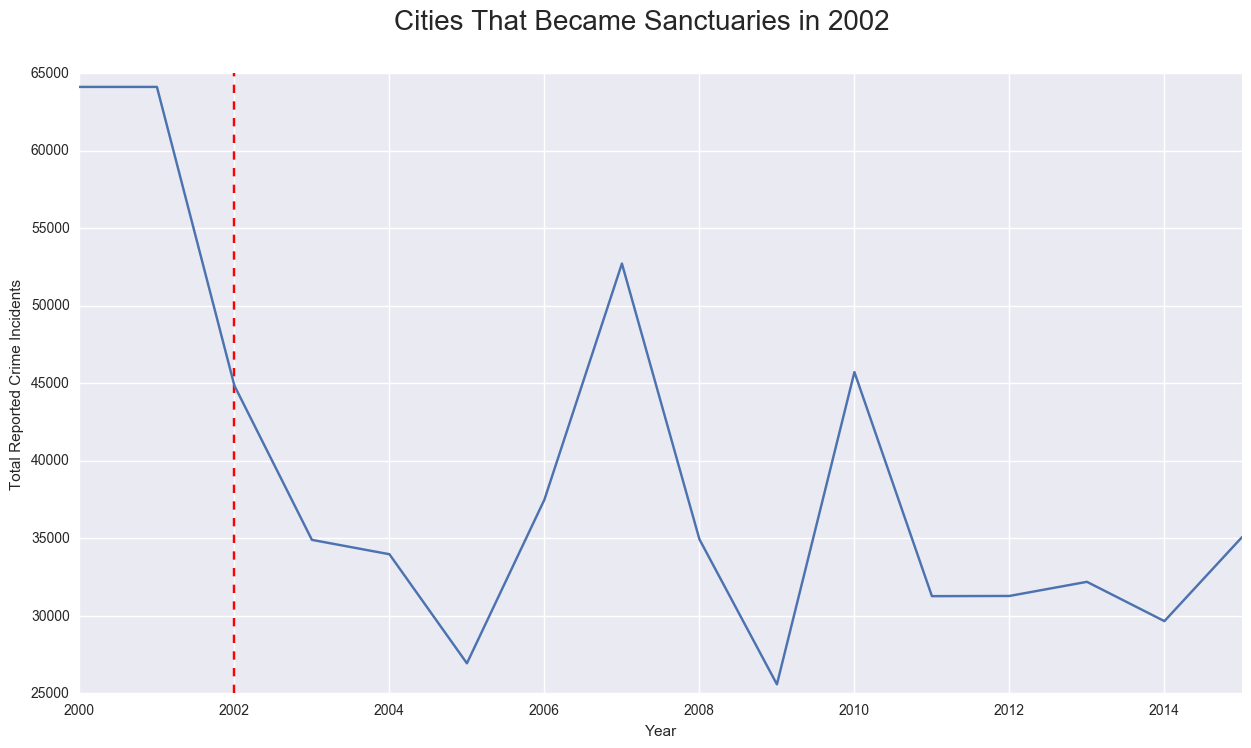

In [42]:
fig, ax= plt.subplots()
final2002['Mean'].plot(kind='line', ax=ax, figsize=(15,8))
ymin, ymax = ax.get_ylim()
fig.suptitle('Cities That Became Sanctuaries in 2002', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Reported Crime Incidents')
plt.vlines([2], ymin, ymax, color='r', linestyle='--')

### Cities Declaring Sanctuary Status in 2003

In [43]:
final2003 = final2.loc[2003]

In [44]:
final2.loc[2003]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Anchorage,13214,13214,13670,13450,12065.0,13396.0,14313.0,13512.0,11858.0,12804.0,12646.0,11843.0,13022.0,14467.0,14136.0,15027.0
Haines,NaN,NaN,NaN,NaN,NaN,54.0,56.0,90.0,45.0,58.0,28.0,41.0,32.0,69.0,47.0,34.0
Sitka,NaN,NaN,NaN,NaN,NaN,393.0,313.0,321.0,345.0,287.0,255.0,215.0,155.0,214.0,245.0,161.0
Fresno,34681,34681,33909,30701,29856.0,NaN,26931.0,24012.0,24838.0,23963.0,27494.0,28336.0,28485.0,25136.0,23483.0,24477.0
San Rafael,2037,2037,1883,2218,2170.0,2224.0,2164.0,2043.0,1775.0,1909.0,1839.0,1673.0,1976.0,2018.0,1857.0,2123.0
Washington,NaN,NaN,44349,40420,33171.0,32916.0,34423.0,35643.0,36894.0,34593.0,34606.0,35297.0,36712.0,37449.0,40837.0,38443.0
Baltimore,63488,63488,55820,48653,47726.0,44489.0,43137.0,40121.0,40650.0,38827.0,37596.0,38709.0,37938.0,39514.0,37766.0,40483.0
Brewster,NaN,NaN,111,109,122.0,NaN,189.0,146.0,145.0,272.0,245.0,248.0,183.0,139.0,131.0,126.0
Orleans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,203.0,214.0,232.0,250.0,195.0,157.0,129.0,129.0


In [45]:
final2003.loc['Mean'] = final2003.mean(numeric_only=False, axis=0)
final2003

C:\Users\updadmin\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Anchorage,13214,13214,13670,13450,12065.000000,13396.000000,14313.000000,13512.0,11858.000000,12804.0000,12646.000000,11843.000000,13022.000000,14467.0000,14136.0,15027.0000
Haines,NaN,NaN,NaN,NaN,NaN,54.000000,56.000000,90.0,45.000000,58.0000,28.000000,41.000000,32.000000,69.0000,47.0,34.0000
Sitka,NaN,NaN,NaN,NaN,NaN,393.000000,313.000000,321.0,345.000000,287.0000,255.000000,215.000000,155.000000,214.0000,245.0,161.0000
Fresno,34681,34681,33909,30701,29856.000000,NaN,26931.000000,24012.0,24838.000000,23963.0000,27494.000000,28336.000000,28485.000000,25136.0000,23483.0,24477.0000
San Rafael,2037,2037,1883,2218,2170.000000,2224.000000,2164.000000,2043.0,1775.000000,1909.0000,1839.000000,1673.000000,1976.000000,2018.0000,1857.0,2123.0000
Washington,NaN,NaN,44349,40420,33171.000000,32916.000000,34423.000000,35643.0,36894.000000,34593.0000,34606.000000,35297.000000,36712.000000,37449.0000,40837.0,38443.0000
Baltimore,63488,63488,55820,48653,47726.000000,44489.000000,43137.000000,40121.0,40650.000000,38827.0000,37596.000000,38709.000000,37938.000000,39514.0000,37766.0,40483.0000
Brewster,NaN,NaN,111,109,122.000000,NaN,189.000000,146.0,145.000000,272.0000,245.000000,248.000000,183.000000,139.0000,131.0,126.0000
Orleans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,203.000000,214.0000,232.000000,250.000000,195.000000,157.0000,129.0,129.0000


In [46]:
final2003 = final2003.T

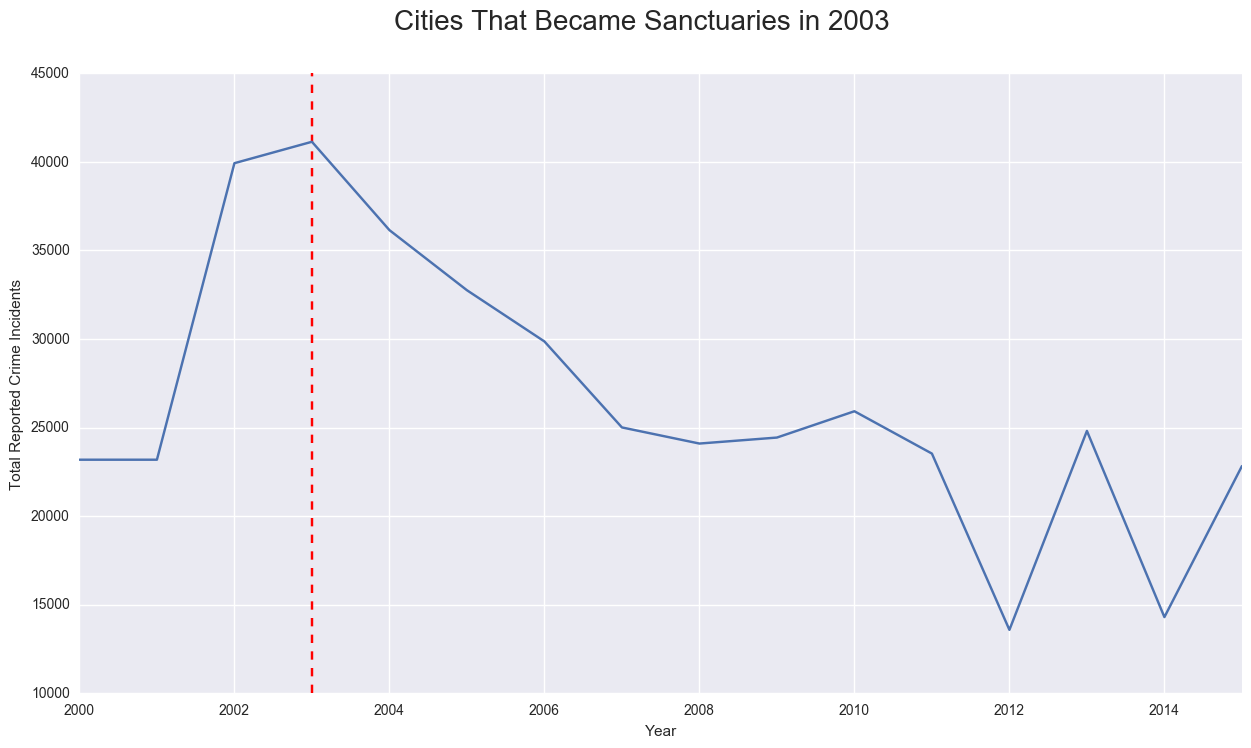

In [47]:
fig, ax= plt.subplots()
final2003['Mean'].plot(kind='line', ax=ax, figsize=(15,8))
ymin, ymax = ax.get_ylim()
fig.suptitle('Cities That Became Sanctuaries in 2003', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Reported Crime Incidents')
plt.vlines([3], ymin, ymax, color='r', linestyle='--')

### Cities Declaring Sanctuary Status in 2004

In [48]:
final2004 = final2.loc[2004]

In [49]:
final2.loc[2004]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Durango,924,924,1074,968,863.0,1488.0,1075.0,990.0,940.0,914.0,874.0,922.0,471.0,511.0,551.0,684.0
Portland,3016,3016,3525,3278,NaN,3237.0,3717.0,3310.0,3023.0,3040.0,3163.0,2829.0,2805.0,2789.0,2292.0,2237.0
Lexington,NaN,NaN,NaN,214,NaN,287.0,261.0,349.0,348.0,233.0,319.0,345.0,239.0,249.0,230.0,169.0
Lansing,7212,7212,6601,6369,NaN,6152.0,5829.0,5368.0,5442.0,NaN,5429.0,5456.0,4852.0,5164.0,4848.0,4777.0
St. Paul,19046,19046,17803,15718,15444.0,16136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13173.0,12357.0,11985.0
St. Louis,52635,52635,50429,46635,45701.0,46568.0,49356.0,41555.0,37826.0,36948.0,33529.0,31619.0,27656.0,26164.0,25267.0,25790.0
Elko,717,717,632,574,581.0,633.0,656.0,569.0,628.0,753.0,772.0,721.0,954.0,1067.0,864.0,895.0
Montclair,1511,1511,1355,1387,1169.0,1073.0,1084.0,877.0,778.0,624.0,705.0,742.0,729.0,644.0,612.0,NaN
Trenton,6964,6964,6199,6195,5162.0,5089.0,3751.0,3810.0,3625.0,3778.0,3714.0,3778.0,3997.0,3443.0,2960.0,NaN


In [50]:
final2004.loc['Mean'] = final2004.mean(numeric_only=False, axis=0)
final2004

C:\Users\updadmin\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Durango,924,924,1074,968,863.00,1488.0,1075.0,990.0,940.0,914.000000,874.0,922.0,471.0,511.000000,551.000000,684.000000
Portland,3016,3016,3525,3278,NaN,3237.0,3717.0,3310.0,3023.0,3040.000000,3163.0,2829.0,2805.0,2789.000000,2292.000000,2237.000000
Lexington,NaN,NaN,NaN,214,NaN,287.0,261.0,349.0,348.0,233.000000,319.0,345.0,239.0,249.000000,230.000000,169.000000
Lansing,7212,7212,6601,6369,NaN,6152.0,5829.0,5368.0,5442.0,NaN,5429.0,5456.0,4852.0,5164.000000,4848.000000,4777.000000
St. Paul,19046,19046,17803,15718,15444.00,16136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13173.000000,12357.000000,11985.000000
St. Louis,52635,52635,50429,46635,45701.00,46568.0,49356.0,41555.0,37826.0,36948.000000,33529.0,31619.0,27656.0,26164.000000,25267.000000,25790.000000
Elko,717,717,632,574,581.00,633.0,656.0,569.0,628.0,753.000000,772.0,721.0,954.0,1067.000000,864.000000,895.000000
Montclair,1511,1511,1355,1387,1169.00,1073.0,1084.0,877.0,778.0,624.000000,705.0,742.0,729.0,644.000000,612.000000,NaN
Trenton,6964,6964,6199,6195,5162.00,5089.0,3751.0,3810.0,3625.0,3778.000000,3714.0,3778.0,3997.0,3443.000000,2960.000000,NaN


In [51]:
final2004 = final2004.T

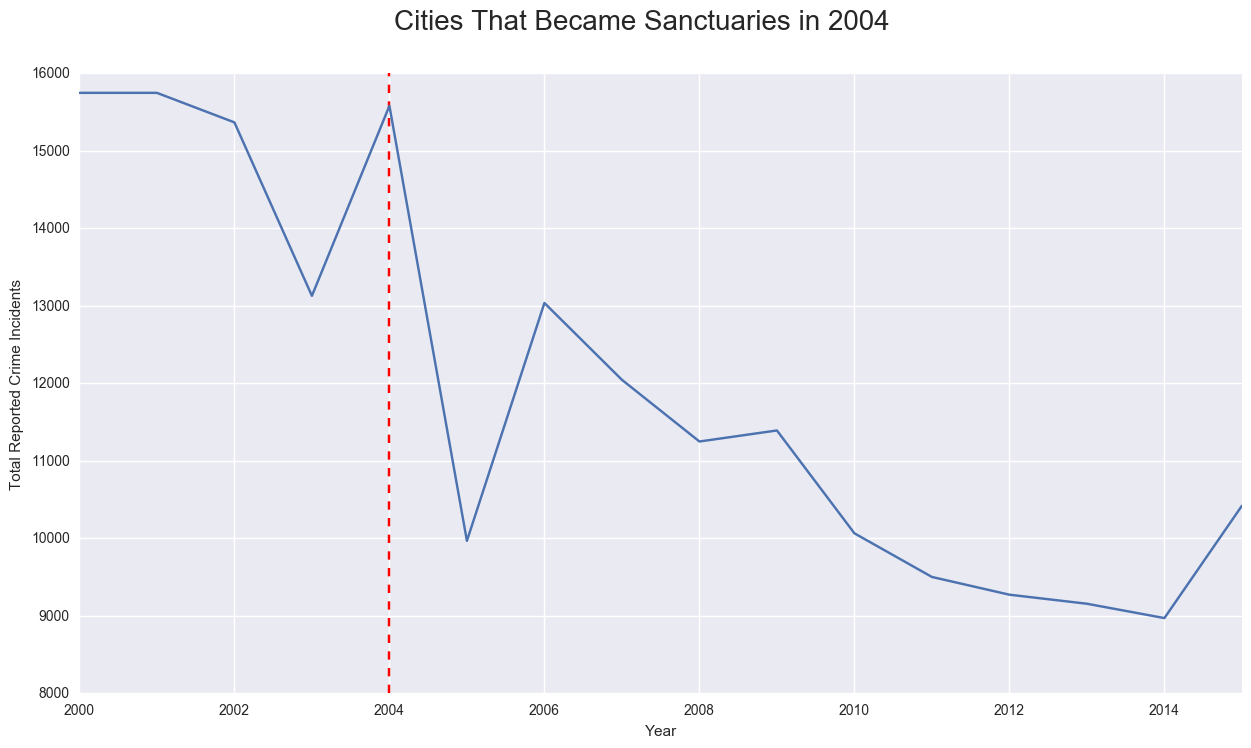

In [52]:
fig, ax= plt.subplots()
final2004['Mean'].plot(kind='line', ax=ax, figsize=(15,8))
ymin, ymax = ax.get_ylim()
fig.suptitle('Cities That Became Sanctuaries in 2004', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Reported Crime Incidents')
plt.vlines([4], ymin, ymax, color='r', linestyle='--')

### Cities Declaring Sanctuary Status in 2006

In [52]:
final2006 = final2.loc[2006]

In [53]:
final2.loc[2006]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Chandler,NaN,NaN,11204,10956,10278.0,9149.0,9683.0,8757.0,8785.0,8198.0,8207.0,8097.0,NaN,6475.0,6109.0,5883.0
New Haven,9844,9844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9226.0,9219.0,8227.0,8386.0,7711.0,6547.0,NaN
Boston,NaN,NaN,35706,35049,34533.0,32684.0,32627.0,31416.0,29105.0,26941.0,26447.0,24697.0,23615.0,22890.0,22018.0,20110.0
Brookline,NaN,NaN,1269,1075,NaN,NaN,NaN,1137.0,NaN,NaN,989.0,956.0,885.0,761.0,931.0,968.0
Newark,18748,18748,17814,16592,16066.0,15541.0,14295.0,13053.0,12410.0,11419.0,12094.0,13259.0,13419.0,12481.0,10966.0,NaN


In [54]:
final2006.loc['Mean'] = final2006.mean(numeric_only=False, axis=0)
final2006

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Chandler,NaN,NaN,11204,10956,10278.000000,9149.000000,9683.000000,8757.00,8785.000000,8198.0,8207.0,8097.0,NaN,6475.0,6109.0,5883.0
New Haven,9844,9844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9226.0,9219.0,8227.0,8386.00,7711.0,6547.0,NaN
Boston,NaN,NaN,35706,35049,34533.000000,32684.000000,32627.000000,31416.00,29105.000000,26941.0,26447.0,24697.0,23615.00,22890.0,22018.0,20110.0
Brookline,NaN,NaN,1269,1075,NaN,NaN,NaN,1137.00,NaN,NaN,989.0,956.0,885.00,761.0,931.0,968.0
Newark,18748,18748,17814,16592,16066.000000,15541.000000,14295.000000,13053.00,12410.000000,11419.0,12094.0,13259.0,13419.00,12481.0,10966.0,NaN
Mean,14296,14296,16498.2,15918,20292.333333,19124.666667,18868.333333,13590.75,16766.666667,13946.0,11391.2,11047.2,11576.25,10063.6,9314.2,8987.0


In [55]:
final2006 = final2006.T

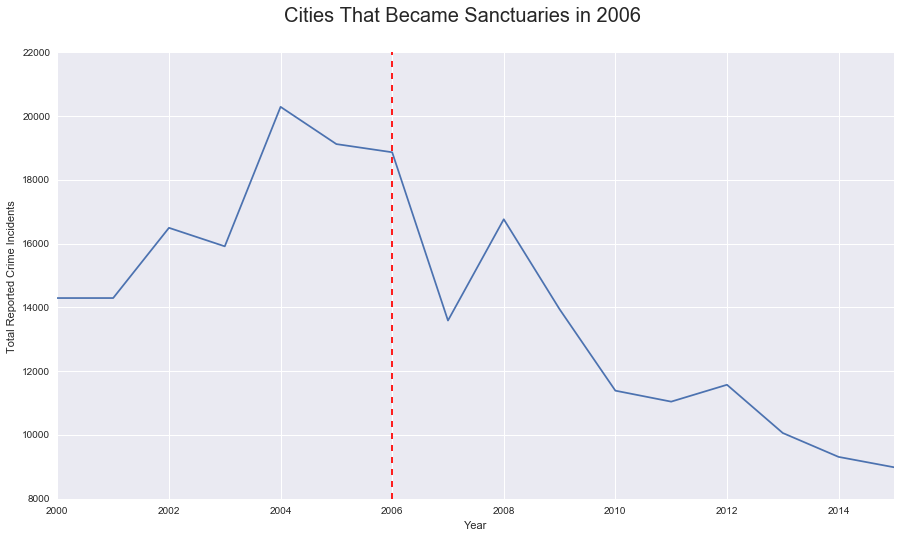

In [56]:
fig, ax= plt.subplots()
final2006['Mean'].plot(kind='line', ax=ax, figsize=(15,8))
ymin, ymax = ax.get_ylim()
fig.suptitle('Cities That Became Sanctuaries in 2006', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Reported Crime Incidents')
plt.vlines([6], ymin, ymax, color='r', linestyle='--')

### Cities Declaring Sanctuary Status in 2007

In [57]:
final2007 = final2.loc[2007]

In [58]:
final2.loc[2007]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Berkeley,9470,9470,10271,9621,9168.0,8546.0,7969.0,7755.0,7489.0,7082.0,6476.0,5546.0,6183.0,5939.0,5533.0,6436.0
East Palo Alto,1244,1244,1200,1471,1525.0,1554.0,1369.0,949.0,1189.0,1311.0,1117.0,1087.0,920.0,944.0,698.0,NaN
Garden Grove,5176,5176,5430,5334,5231.0,5250.0,4860.0,4797.0,4457.0,3847.0,4129.0,3836.0,4456.0,3852.0,3504.0,NaN
Los Angeles,189278,189278,190992,184605,167986.0,NaN,135985.0,129263.0,127374.0,118310.0,111188.0,106375.0,106025.0,102368.0,102310.0,118659.0
Oakland,27627,27627,29875,28243,27336.0,28719.0,31943.0,31269.0,29393.0,26966.0,23592.0,27556.0,34305.0,33160.0,31277.0,30619.0
Richmond,7190,7190,7838,8102,7260.0,6982.0,6719.0,6727.0,6054.0,5535.0,5799.0,5581.0,6180.0,5938.0,5124.0,NaN
San Jose,25163,25163,24139,24126,25677.0,26422.0,27801.0,27821.0,25941.0,26194.0,25296.0,25178.0,32010.0,28725.0,27819.0,28435.0
Santa Cruz,3546,3546,3569,3631,3466.0,3640.0,3597.0,2913.0,2537.0,3569.0,3489.0,3836.0,4018.0,3570.0,3794.0,NaN
Watsonville,2250,2250,2259,2378,2072.0,2280.0,2311.0,2673.0,2225.0,2175.0,1866.0,1886.0,1837.0,1545.0,1754.0,2233.0


In [59]:
final2007.loc['Mean'] = final2007.mean(numeric_only=False, axis=0)
final2007

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
Berkeley,9470,9470,10271,9621,9168.000000,8546.0,7969.00,7755.000000,7489.00,7082.0,6476.000000,5546.000000,6183.000000,5939.000000,5533.0,6436.00
East Palo Alto,1244,1244,1200,1471,1525.000000,1554.0,1369.00,949.000000,1189.00,1311.0,1117.000000,1087.000000,920.000000,944.000000,698.0,NaN
Garden Grove,5176,5176,5430,5334,5231.000000,5250.0,4860.00,4797.000000,4457.00,3847.0,4129.000000,3836.000000,4456.000000,3852.000000,3504.0,NaN
Los Angeles,189278,189278,190992,184605,167986.000000,NaN,135985.00,129263.000000,127374.00,118310.0,111188.000000,106375.000000,106025.000000,102368.000000,102310.0,118659.00
Oakland,27627,27627,29875,28243,27336.000000,28719.0,31943.00,31269.000000,29393.00,26966.0,23592.000000,27556.000000,34305.000000,33160.000000,31277.0,30619.00
Richmond,7190,7190,7838,8102,7260.000000,6982.0,6719.00,6727.000000,6054.00,5535.0,5799.000000,5581.000000,6180.000000,5938.000000,5124.0,NaN
San Jose,25163,25163,24139,24126,25677.000000,26422.0,27801.00,27821.000000,25941.00,26194.0,25296.000000,25178.000000,32010.000000,28725.000000,27819.0,28435.00
Santa Cruz,3546,3546,3569,3631,3466.000000,3640.0,3597.00,2913.000000,2537.00,3569.0,3489.000000,3836.000000,4018.000000,3570.000000,3794.0,NaN
Watsonville,2250,2250,2259,2378,2072.000000,2280.0,2311.00,2673.000000,2225.00,2175.0,1866.000000,1886.000000,1837.000000,1545.000000,1754.0,2233.00


In [60]:
final2007 = final2007.T

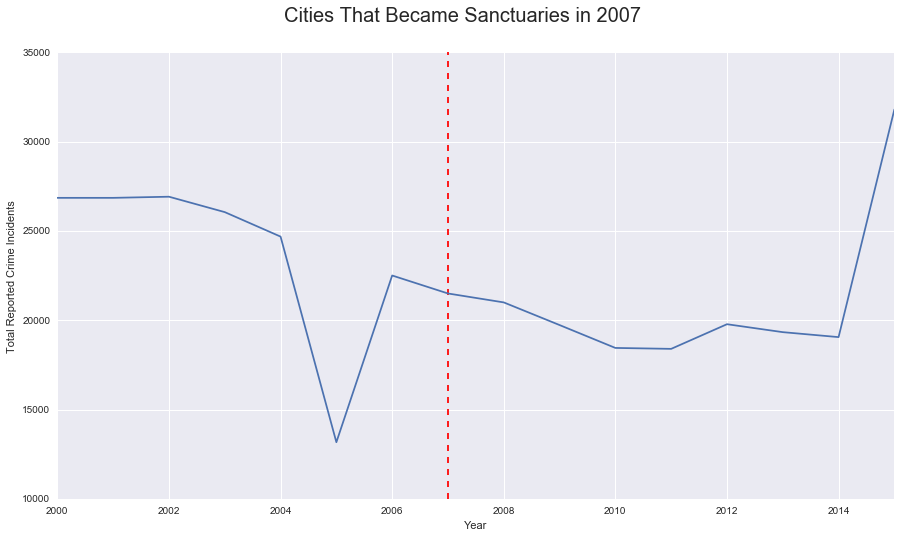

In [61]:
fig, ax= plt.subplots()
final2007['Mean'].plot(kind='line', ax=ax, figsize=(15,8))
ymin, ymax = ax.get_ylim()
fig.suptitle('Cities That Became Sanctuaries in 2007', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Reported Crime Incidents')
plt.vlines([7], ymin, ymax, color='r', linestyle='--')

In [62]:
final2008 = final2.loc[2008]

In [63]:
final2.loc[2008]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
San Diego,50444,50444,50124,53748,52217.0,52816.0,51600.0,50499.0,46412.0,38177.0,36369.0,34813.0,37229.0,37031.0,32026.0,34740.0
Hamtramck,NaN,NaN,1582,1742,NaN,1832.0,1532.0,1522.0,1741.0,NaN,1485.0,1259.0,1000.0,1180.0,891.0,855.0


In [64]:
final2008.loc['Mean'] = final2008.mean(numeric_only=False, axis=0)
final2008

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
City,,,,,,,,,,,,,,,,
San Diego,50444,50444,50124,53748,52217.0,52816.0,51600.0,50499.0,46412.0,38177.0,36369.0,34813.0,37229.0,37031.0,32026.0,34740.0
Hamtramck,NaN,NaN,1582,1742,NaN,1832.0,1532.0,1522.0,1741.0,NaN,1485.0,1259.0,1000.0,1180.0,891.0,855.0
Mean,50444,50444,25853,27745,52217.0,27324.0,26566.0,26010.5,24076.5,38177.0,18927.0,18036.0,19114.5,19105.5,16458.5,17797.5


### Cities Declaring Sanctuary Status in 2008

In [65]:
final2008 = final2008.T

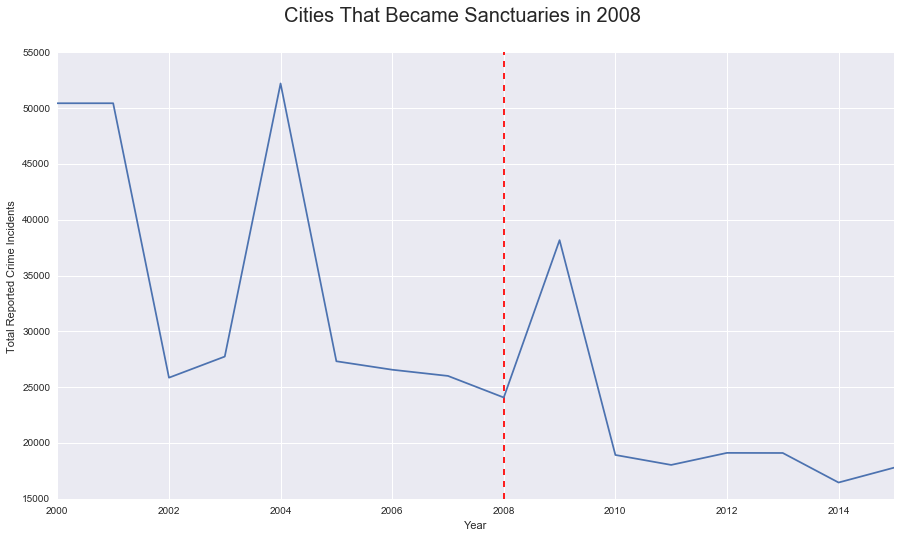

In [66]:
fig, ax= plt.subplots()
final2008['Mean'].plot(kind='line', ax=ax, figsize=(15,8))
ymin, ymax = ax.get_ylim()
fig.suptitle('Cities That Became Sanctuaries in 2008', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Total Reported Crime Incidents')
plt.vlines([8], ymin, ymax, color='r', linestyle='--')

## Measuring Crime Rates from Declaration of Sanctuary City Status

Below we examined the total crime across all cities at the beginning year before any city declared sanctuary status **2000**, the midpoint **2006** and the last year of data **2015**. To create this plot we used the original data table "final" to plot the mean of three selected years stacked on top of each other.

### Conclusion
Based on the following plot, there is no obvious correlation between Crime Rate incidences over time in each individual city. In some instances crime decreased and in others crime increased over time.

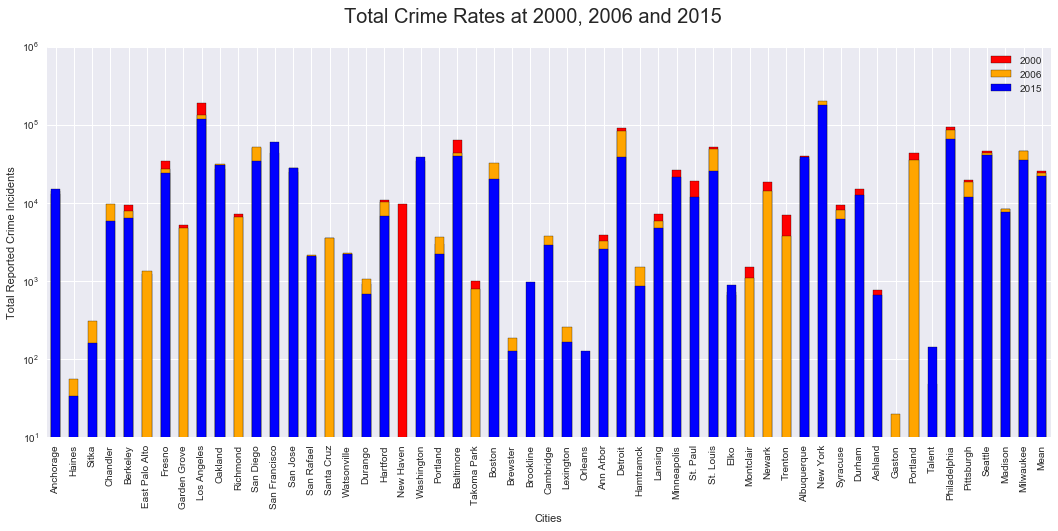

In [67]:
fig, ax= plt.subplots()
final['2000'].plot(kind='bar', figsize=(18,7), logy=True, color='red', legend=True)
final['2006'].plot(kind='bar', figsize=(18,7), logy=True, color='orange', legend=True)
final['2015'].plot(kind='bar', figsize=(18,7), logy=True, color='blue', legend=True)
fig.suptitle('Total Crime Rates at 2000, 2006 and 2015', fontsize=20)
plt.xlabel('Cities')
plt.ylabel('Total Reported Crime Incidents')

## Aggregrate Crime Rates for Sanctuary City Status

Below we plotted total crime incidences over time utilizing the mean of all cities over the years 2000-2015 to determine if the average total crime rate had decreased or increased. 

### Conclusion
As you can see from the plot below, the average total crime rate had decreased amongst the sanctuary cities over time. While this aligns with our hypothesis, we cannot commit that declaring Sanctuary City Status will lead to a decrease in crime rates. This decrease could have been incurred by a general strengthening of police and federal agency monitoring in cities that have been declared sanctuaries.

We can however conclude, that the popular consensus amongst Republican politicians that Sanctuary Cities have an increased incidence in crime is wholly **false.**

In [68]:
final2 = final.T

In [69]:
final2

City,Anchorage,Haines,Sitka,Chandler,Berkeley,East Palo Alto,Fresno,Garden Grove,Los Angeles,Oakland,...,Ashland,Gaston,Portland,Talent,Philadelphia,Pittsburgh,Seattle,Madison,Milwaukee,Mean
2000,13214,NaN,NaN,NaN,9470,1244,34681,5176,189278,27627,...,763,NaN,43183,NaN,93878,19708,46091,8299,45748,25894.3
2001,13214,NaN,NaN,NaN,9470,1244,34681,5176,189278,27627,...,763,NaN,43183,NaN,93878,19708,46091,8299,45748,25894.3
2002,13670,NaN,NaN,11204,10271,1200,33909,5430,190992,29875,...,947,NaN,43327,NaN,83392,19737,46432,8847,46315,29034.3
2003,13450,NaN,NaN,10956,9621,1471,30701,5334,184605,28243,...,793,NaN,46387,NaN,83074,19994,50252,8679,43087,26859.6
2004,12065,NaN,NaN,10278,9168,1525,29856,5231,167986,27336,...,822,NaN,45529,NaN,81833,19017,46595,8121,36705,27725.5
2005,13396,54,393,9149,8546,1554,NaN,5250,NaN,28719,...,842,21,41503,NaN,82028,19013,47580,8576,NaN,20672.1
2006,14313,56,313,9683,7969,1369,26931,4860,135985,31943,...,NaN,20,35868,49,85495,18709,43684,8471,45931,24537.6
2007,13512,90,321,8757,7755,949,24012,4797,129263,31269,...,625,NaN,35287,130,82975,17388,37627,9058,46239,22831.6
2008,11858,45,345,8785,7489,1189,24838,4457,127374,29393,...,742,13,32688,122,83355,15983,36267,9147,43901,21645.6
2009,12804,58,287,8198,7082,1311,23963,3847,118310,26966,...,566,7,29600,142,75051,14862,38951,8737,41375,20259.1


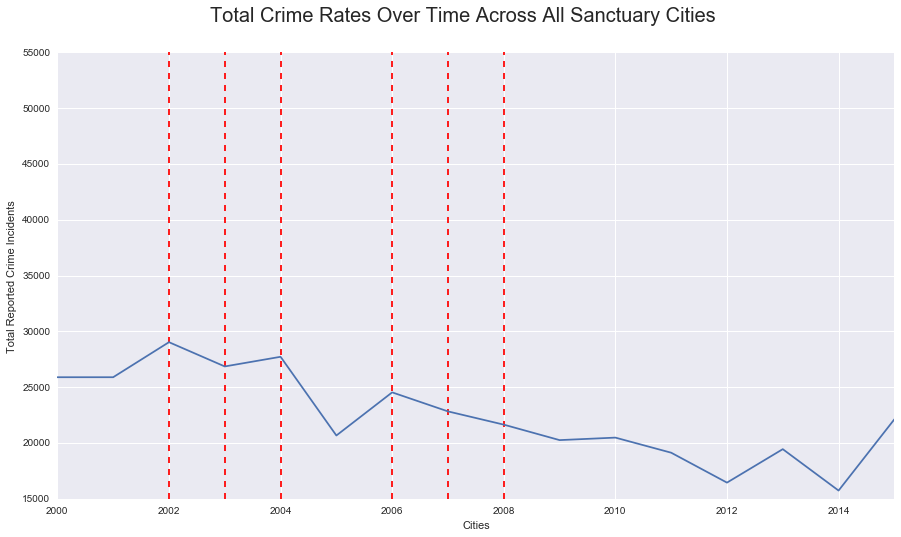

In [70]:
fig, ax= plt.subplots()
final2['Mean'].plot(figsize=(15,8))
fig.suptitle('Total Crime Rates Over Time Across All Sanctuary Cities', fontsize=20)
plt.xlabel('Cities')
plt.ylabel('Total Reported Crime Incidents')
plt.vlines([2, 3, 4, 6, 7, 8], ymin, ymax, color='r', linestyle='--')